# Production analysis

**NOTE**: This notebooks requires access to a remo output dataset at DKRZ!

This notebooks shows how to use the tools from `pyremo.analysis` to evaluate and plot results from a REMO production run. The functions rely on certain conventions concerning the REMO output filenames. However, it should work for most REMO runs and here we show how to do a standard analysis that might be useful.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Here we will use the output of an early REMO test run that provides us with production like REMO output data with a monthly temporal resolution. The data can be found here: 

In [3]:
path = '/work/ch0636/g300046/remo_results_056000'

Since we want to look at the whole dataset lazily, we will require a dask client that manages parallel access to the data.

In [4]:
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:40435' processes=6 threads=24, memory=31.25 GiB>

In [5]:
from pyremo.analysis import plot, analysis, obs

/mnt/lustre01/pf/zmaw/g300046/python/packages/pyremo/pyremo/cmor/remo_cmor.py:16: UserWarning: no python cmor available
  warnings.warn("no python cmor available")


The `pyremo.analysis` module provides the `RemoExperiment` class that will manage easy access to the REMO output. The class will scan the output directory according to REMO output filenaming conventions and will also open the monthly dataset.

In [6]:
%time exp = analysis.RemoExperiment('/work/ch0636/g300046/remo_results_056000')

100%|██████████| 398/398 [00:00<00:00, 2595.10it/s]


CPU times: user 29.4 s, sys: 2.78 s, total: 32.1 s
Wall time: 47 s


We can now easiy access the REMO monthly output dataset.

In [7]:
remo_ds = exp.ds
remo_ds

<xarray.Dataset>
Dimensions:                     (rlon: 433, rlat: 433, meansea: 1, height10m: 1, height2m: 1, lev_4: 1, nhyi: 28, nhym: 27, lev_5: 1, snlevs: 3, time: 456)
Coordinates:
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
  * meansea                     (meansea) float64 0.0
  * height10m                   (height10m) float64 10.0
  * height2m                    (height2m) float64 2.0
  * lev_4                       (lev_4) float64 1.0
  * lev_5                       (lev_5) float64 27.0
  * snlevs                      (snlevs) float64 1.0 2.0 3.0
    lon                         (rlat, rlon) float64 -10.32 -10.23 ... 68.65
    lat                         (rlat, rlon) float64 21.28 21.32 ... 67.86 67.8
  * time                        (time) datetime64[ns] 1979-01-15 ... 2016-12-15
Dimensions without coordinates: nhyi, nhym
Data variables: (12/132)
    hyai                        (nhyi) float64 dask.array<chunksize=(28,), meta=np.ndarray>
    hybi                        (nhyi) float64 dask.array<chunksize=(28,), meta=np.ndarray>
    hyam                        (nhym) float64 dask.array<chunksize=(27,), meta=np.ndarray>
    hybm                        (nhym) float64 dask.array<chunksize=(27,), meta=np.ndarray>
    rotated_latitude_longitude  |S1 ...
    QDB                         (time, rlat, rlon) float32 dask.array<chunksize=(1, 433, 433), meta=np.ndarray>
    ...                          ...
    EVAPFL                      (time, rlat, rlon) float32 dask.array<chunksize=(1, 433, 433), meta=np.ndarray>
    TMCHFL                      (time, rlat, rlon) float32 dask.array<chunksize=(1, 433, 433), meta=np.ndarray>
    SNMLRHO                     (time, snlevs, rlat, rlon) float32 dask.array<chunksize=(1, 3, 433, 433), meta=np.ndarray>
    BLA                         (rlat, rlon) float32 ...
    FIB                         (rlat, rlon) float32 ...
    mask                        (rlat, rlon) int64 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
Attributes:
    CDI:                  Climate Data Interface version 1.9.6 (http://mpimet...
    Conventions:          CF-1.6
    history:              preprocessing with pyremo = 0.1.0
    institution:          European Centre for Medium-Range Weather Forecasts
    CDO:                  Climate Data Operators version 1.9.6 (http://mpimet...
    _NCProperties:        version=2,netcdf=4.7.4,hdf5=1.10.6
    forcing_file_format:  NetCDF
    remo_version:         2.0.0
    git_branch:           nc_meta
    git_hash:             c4ee7f4
    system:               Linux eddy3 2.6.32-754.33.1.el6.x86_64 #1 SMP Mon A...

The `obs` module provides the same easy access to some obervational datasets. Right now, available datasets contain `CRU_TS4`, `EOBS` and `HYRAS` for Germany. Note, that the functions that accumulate those datasets right now rely on how that data is provided on the filesystem at DKRZ since there is no real easy cloud access to those observational datasets. Note that the variable names of the datasets are renamed to CF conventions so that we can agree on a common variable name for comparison.

In [9]:
%time cru_ds = obs.cru_ts4()
cru_ds

CPU times: user 5.39 s, sys: 4.19 s, total: 9.58 s
Wall time: 1min 2s


<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1428)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2019-12-16
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    stn      (time, lat, lon) float64 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    cld      (time, lat, lon) float32 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    dtr      (time, lat, lon) float32 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    frs      (time, lat, lon) timedelta64[ns] dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    pet      (time, lat, lon) float32 dask.array<chunksize=(476, 120, 240), meta=np.ndarray>
    orog     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
    mask     (lat, lon) int64 dask.array<chunksize=(120, 240), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.04 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2004151855. Data generated from:tmp.2004011744.dtb
    history:      Wed 15 Apr 2020 19:58:33 BST : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [10]:
%time eobs_ds = obs.eobs()
eobs_ds

CPU times: user 236 ms, sys: 124 ms, total: 360 ms
Wall time: 1.24 s


<xarray.Dataset>
Dimensions:    (longitude: 464, latitude: 201, time: 25749)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-06-30
Data variables:
    tas        (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    tasmax     (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    tasmin     (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    pr         (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    rsds       (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    psl        (time, latitude, longitude) float32 dask.array<chunksize=(8583, 65, 58), meta=np.ndarray>
    orog       (latitude, longitude) float32 dask.array<chunksize=(201, 464), meta=np.ndarray>
    mask       (latitude, longitude) int64 dask.array<chunksize=(65, 58), meta=np.ndarray>
Attributes:
    E-OBS_version:  22.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Tue Dec  1 07:45:09 2020: ncks --no-abc -d time,0,25748 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [12]:
%time hyras_ds = obs.hyras()
hyras_ds

CPU times: user 11 s, sys: 1.66 s, total: 12.7 s
Wall time: 1min 12s


<xarray.Dataset>
Dimensions:  (Y: 220, X: 240, time: 23741)
Coordinates:
    lon      (Y, X) float32 dask.array<chunksize=(220, 240), meta=np.ndarray>
    lat      (Y, X) float32 dask.array<chunksize=(220, 240), meta=np.ndarray>
  * time     (time) object 1951-01-01 00:00:00 ... 2015-12-31 00:00:00
Dimensions without coordinates: Y, X
Data variables:
    crs      int32 ...
    tas      (time, Y, X) float32 dask.array<chunksize=(365, 220, 240), meta=np.ndarray>
    pr       (time, Y, X) float32 dask.array<chunksize=(365, 220, 240), meta=np.ndarray>
    tmax     (time, Y, X) float32 dask.array<chunksize=(365, 220, 240), meta=np.ndarray>
    tmin     (time, Y, X) float32 dask.array<chunksize=(365, 220, 240), meta=np.ndarray>
    hurs     (time, Y, X) float32 dask.array<chunksize=(365, 220, 240), meta=np.ndarray>
    mask     (Y, X) int64 dask.array<chunksize=(220, 240), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.8.2 (http://mpimet.mpg....
    Conventions:     CF-1.6
    history:         Mon Jul 09 12:20:58 2018: cdo -ifnotthen -eqc,11 /kp/kp0...
    source:          surface observation
    institution:     Deutscher Wetterdienst
    title:           gridded_mean_temperature_dataset_(HYRAS-TAS)
    ...              ...
    references:      Datenlieferung2018_AP101b_HYRAS-TAS.pdf
    creation_date:   2018-02-16 13:09:04
    conventions:     CF-1.6
    conventionsURL:  http://cfconventions.org/cf-conventions/v1.6.0/cf-conven...
    tracking_id:     aa16c4de-9a66-4a83-a191-d8779538c721
    CDO:             Climate Data Operators version 1.8.2 (http://mpimet.mpg....

Once we have access to the data, it's easy to use them for comparison with REMO output. We choose a climatological reasonable time scale of 30 years to compute a sesonal mean for both the REMO output and the observational datasets. For comparison, we will need to regrid the data to a common grid. We will always choose the coarser grid (which is mostly the grid of the observational dataset, except for HYRAS). For the regridding we use [xesmf](https://pangeo-xesmf.readthedocs.io/en/latest/index.html) and its capabilities of [regridding with masks](https://pangeo-xesmf.readthedocs.io/en/latest/notebooks/Masking.html). For that purpose, the datasets contain a `mask` variable that defines the validity of the datasets. For example, the EOBS mask looks like this:

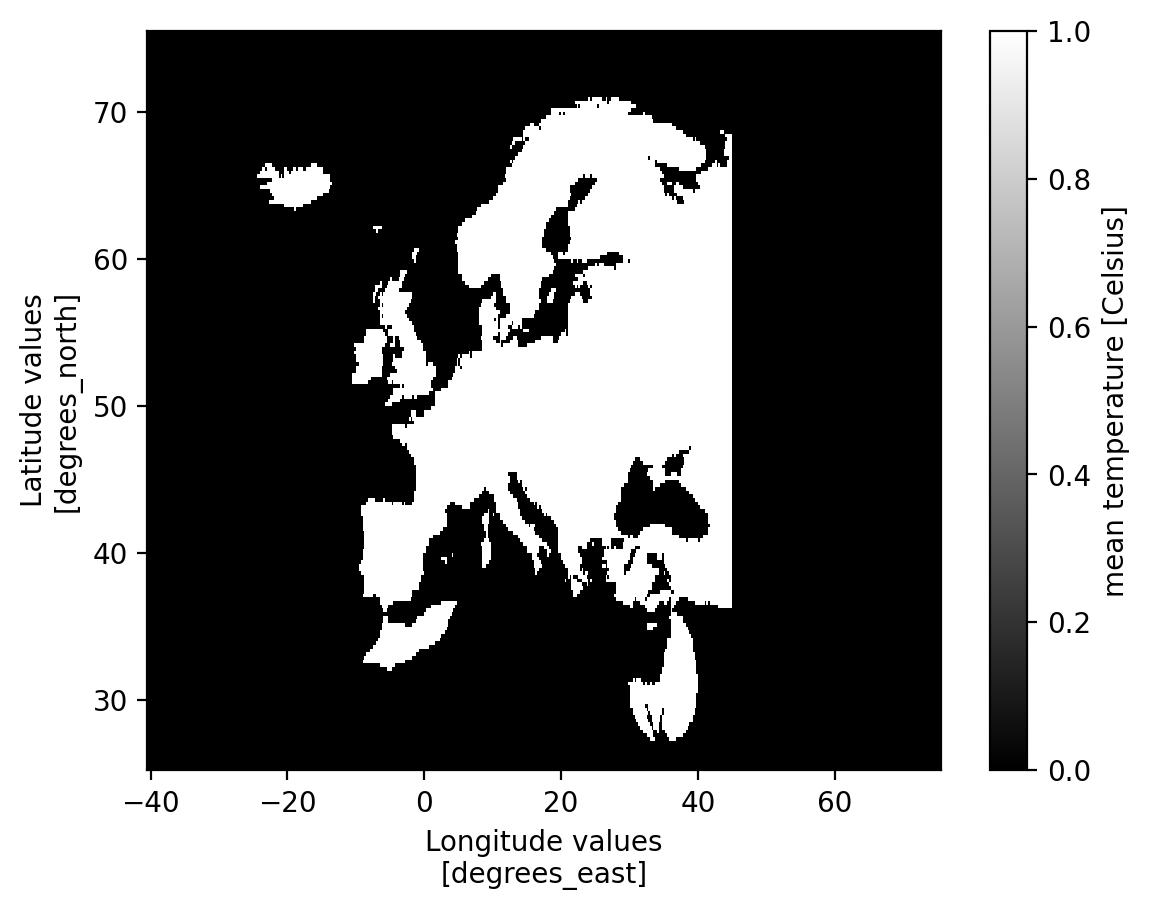

In [17]:
eobs_ds.mask.plot(cmap='binary_r')

and the REMO mask looks like this:

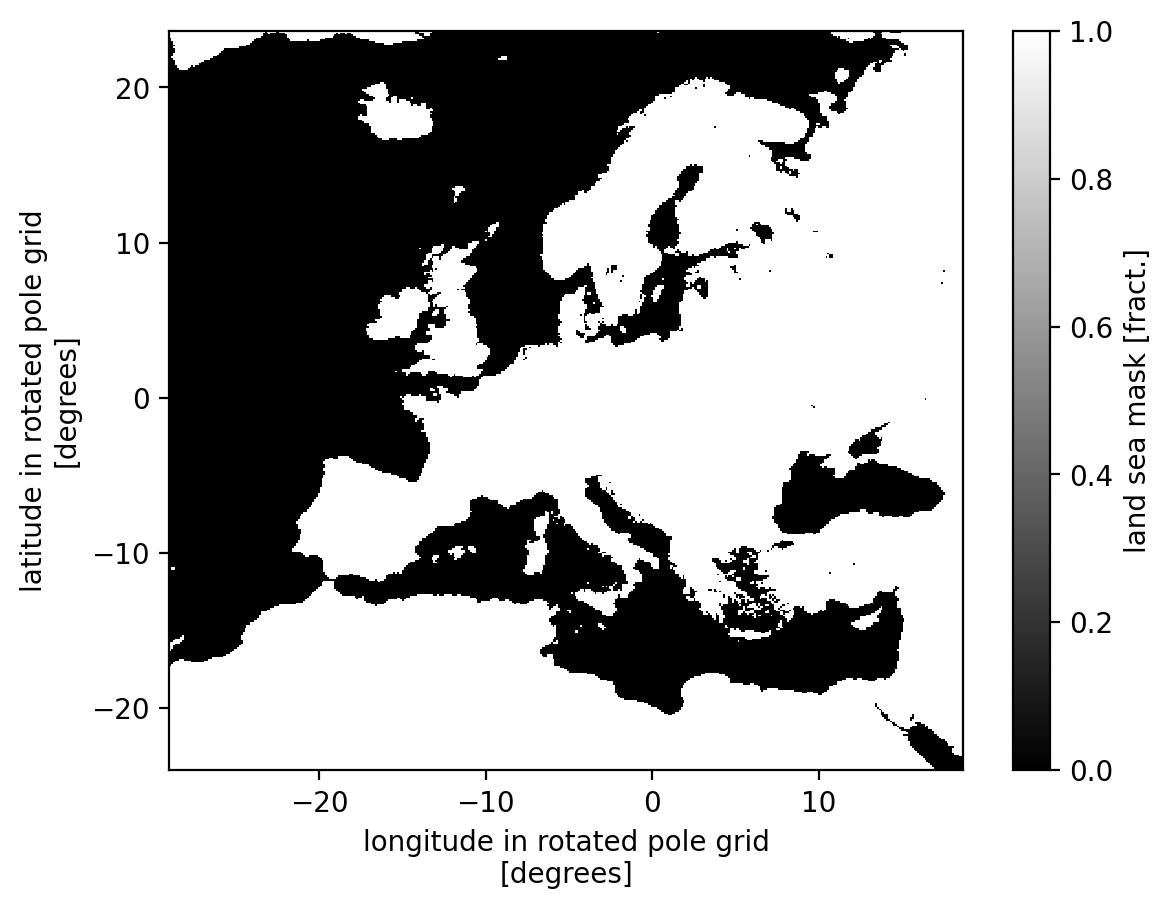

In [19]:
remo_ds.mask.plot(cmap='binary_r')

During the regridding, those masks are used to avoid regridding NaNs that might produce artifacts in the data. For more information, please have a look at the [xesmf documentation](https://pangeo-xesmf.readthedocs.io/en/latest/notebooks/Masking.html).

Now, we will choose the surface temperature `tas` for comparison in seasonal means. We merge the variable with its mask and compare the REMO results to all three observational datasets.

In [21]:
time_range = slice("1980", "2010")

In [22]:
remo_tas = xr.merge([remo_ds.TEMP2.sel(time=time_range)-273.5, remo_ds.mask]).rename({'TEMP2': 'tas'})
remo_orog = remo_ds.FIB
eobs_tas = xr.merge([eobs_ds.tas.sel(time=time_range), eobs_ds.mask])
eobs_orog = eobs_ds.orog
cru_tas = xr.merge([cru_ds.tas.sel(time=time_range), cru_ds.mask])
cru_orog = cru_ds.orog
hyras_tas = xr.merge([hyras_ds.tas.sel(time=time_range), hyras_ds.mask])

## HYRAS

In [24]:
compare_hyras = analysis.compare_seasons(hyras_tas, remo_tas).compute()

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_220x240_433x433.nc 
Reuse pre-computed weights? False 
Input grid shape:           (220, 240) 
Output grid shape:          (433, 433) 
Periodic in longitude?      False


For `HYRAS`, we have regridded the HYRAS data (about 5km) to the more coarse REMO grid (about 12km). Consequently for the plotting, we define the grid transformation as rotated pole:

In [29]:
import cartopy.crs as ccrs
pole = ( remo_ds.rotated_latitude_longitude.grid_north_pole_longitude,  remo_ds.rotated_latitude_longitude.grid_north_pole_latitude)
transform=ccrs.RotatedPole(*pole)

We define the extend of the plot to that of the HYRAS dataset and plot the data in the default Plate Carree projection.

<module 'matplotlib.pyplot' from '/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/matplotlib/pyplot.py'>

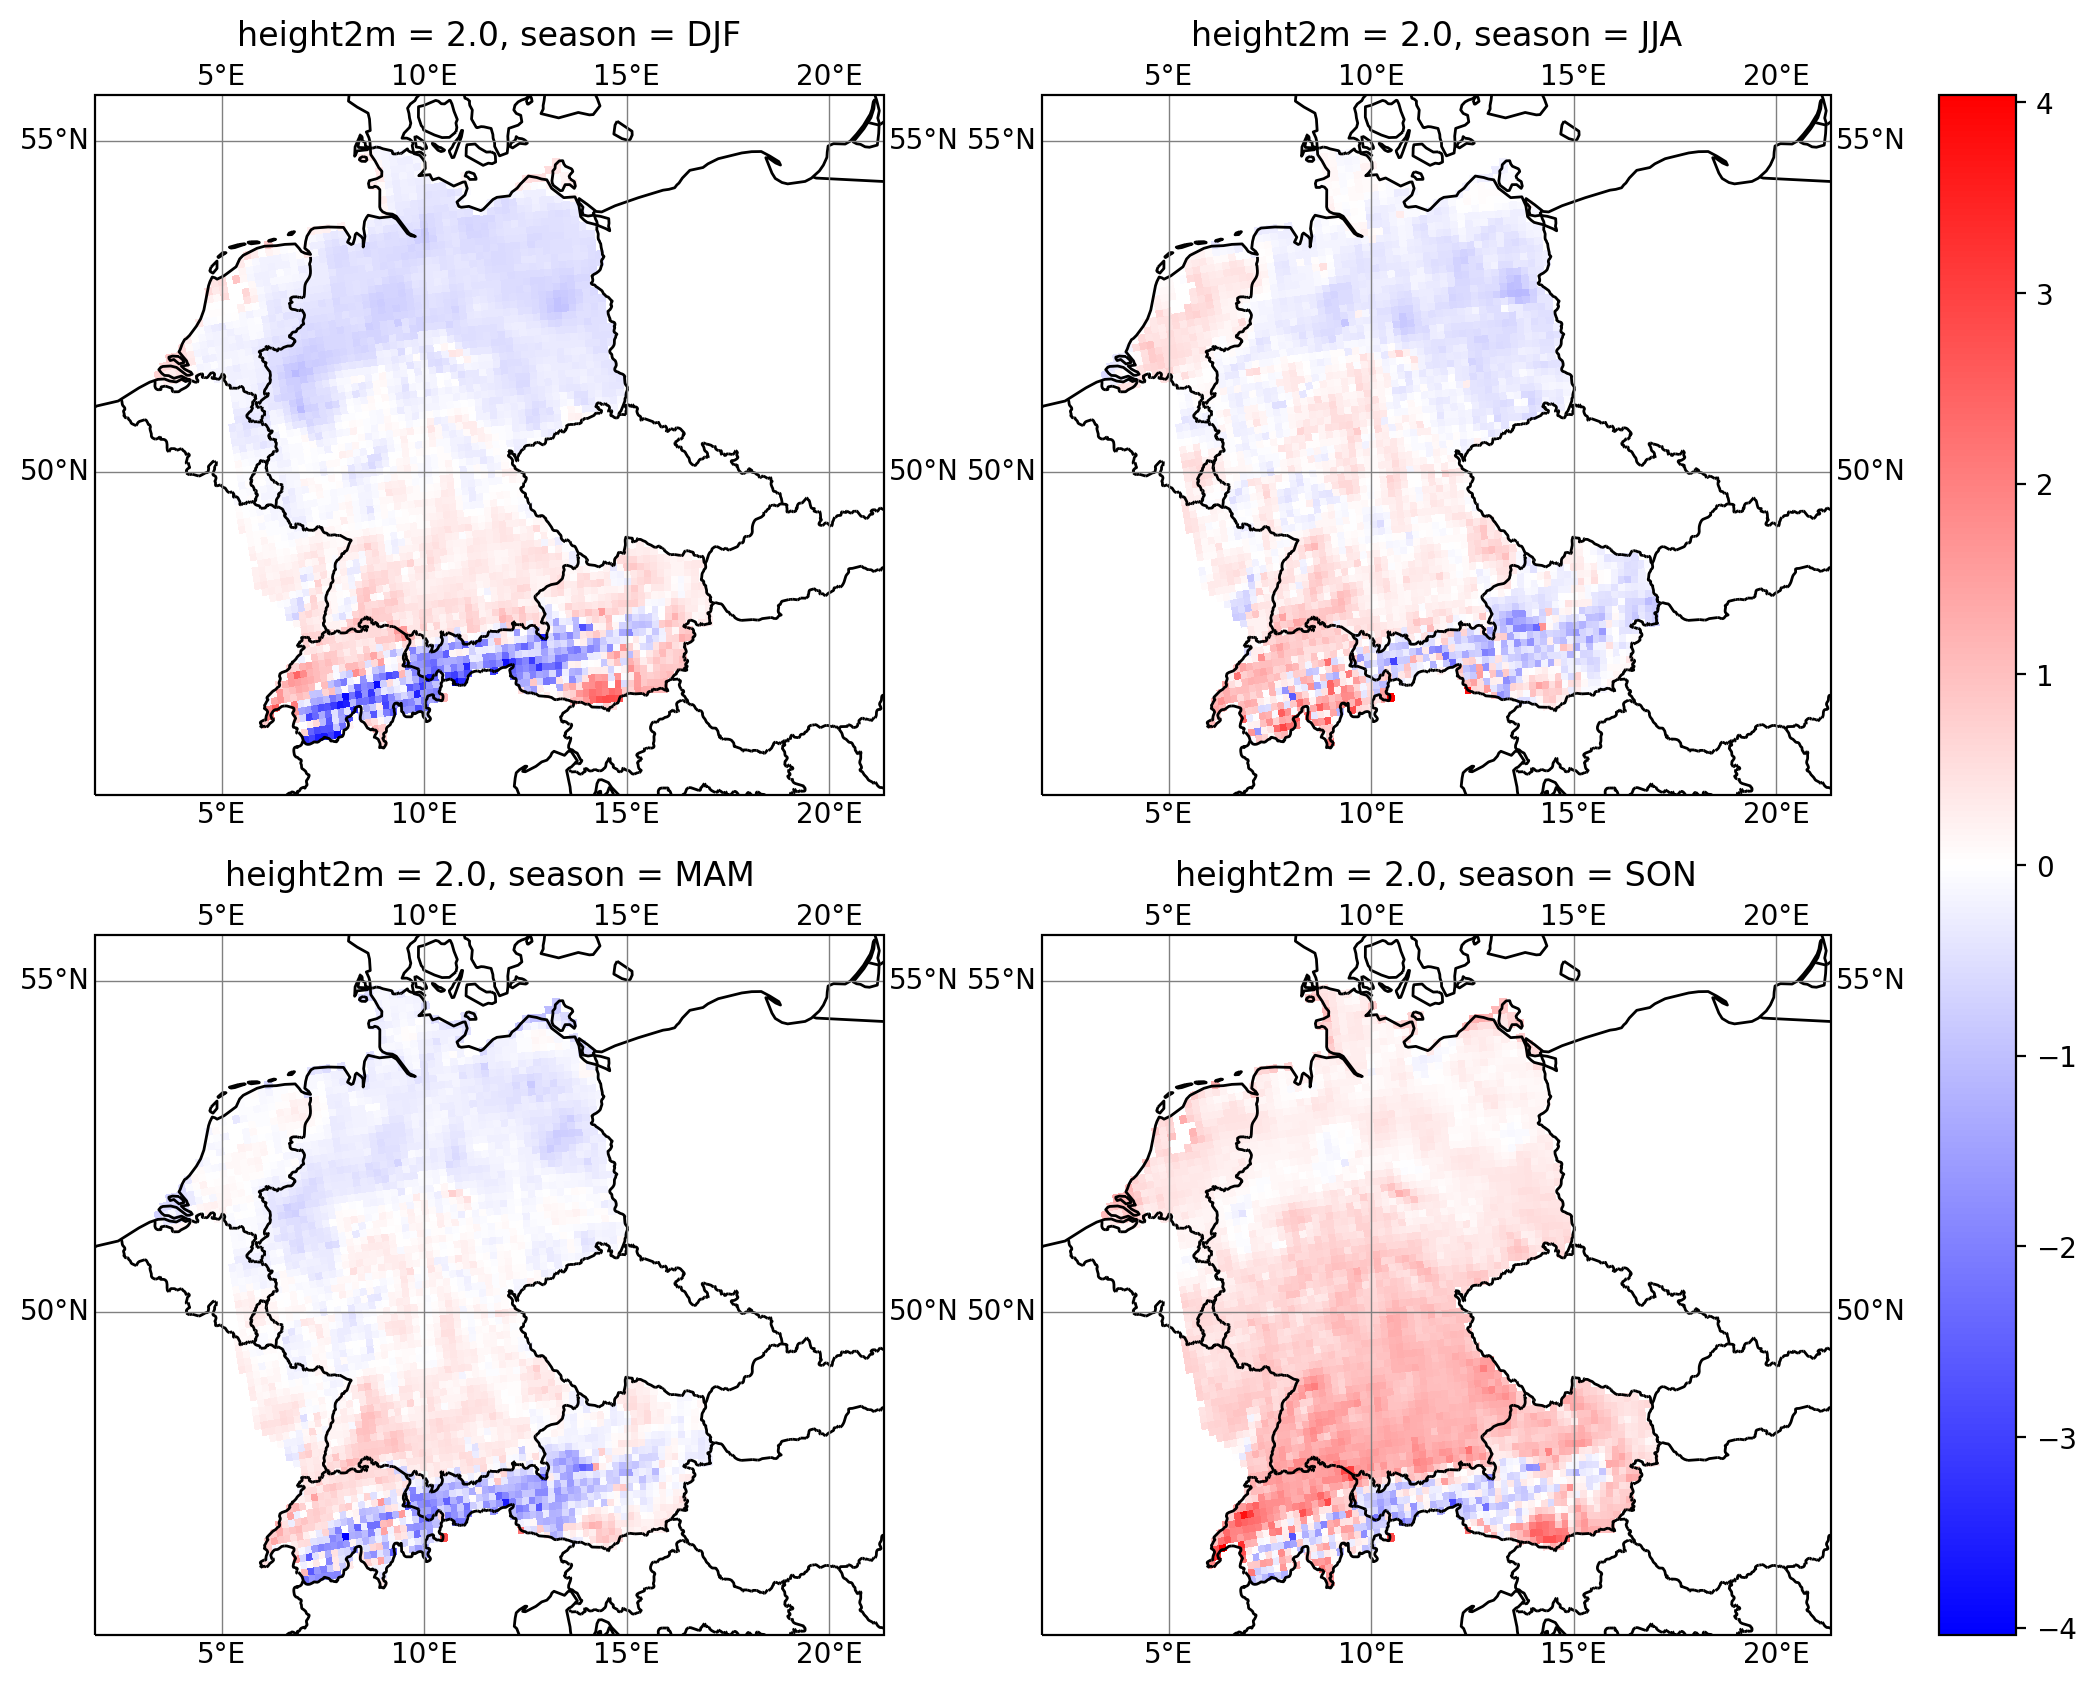

In [58]:
extent = {"extents": [hyras_ds.lon.min(), hyras_ds.lon.max(), hyras_ds.lat.min(), hyras_ds.lat.max()]}
plot.plot_seasons(compare_hyras.tas, transform=transform,
                  extent=extent, borders=True, xlocs=range(-180,180,5), ylocs=range(-90,90,5),
                 figsize=(14,10), aspect="auto")

## CRU_TS4

In [34]:
compare_cru = analysis.compare_seasons(remo_tas, cru_tas).compute()

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_433x433_360x720.nc 
Reuse pre-computed weights? False 
Input grid shape:           (433, 433) 
Output grid shape:          (360, 720) 
Periodic in longitude?      False


<module 'matplotlib.pyplot' from '/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/matplotlib/pyplot.py'>

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) 

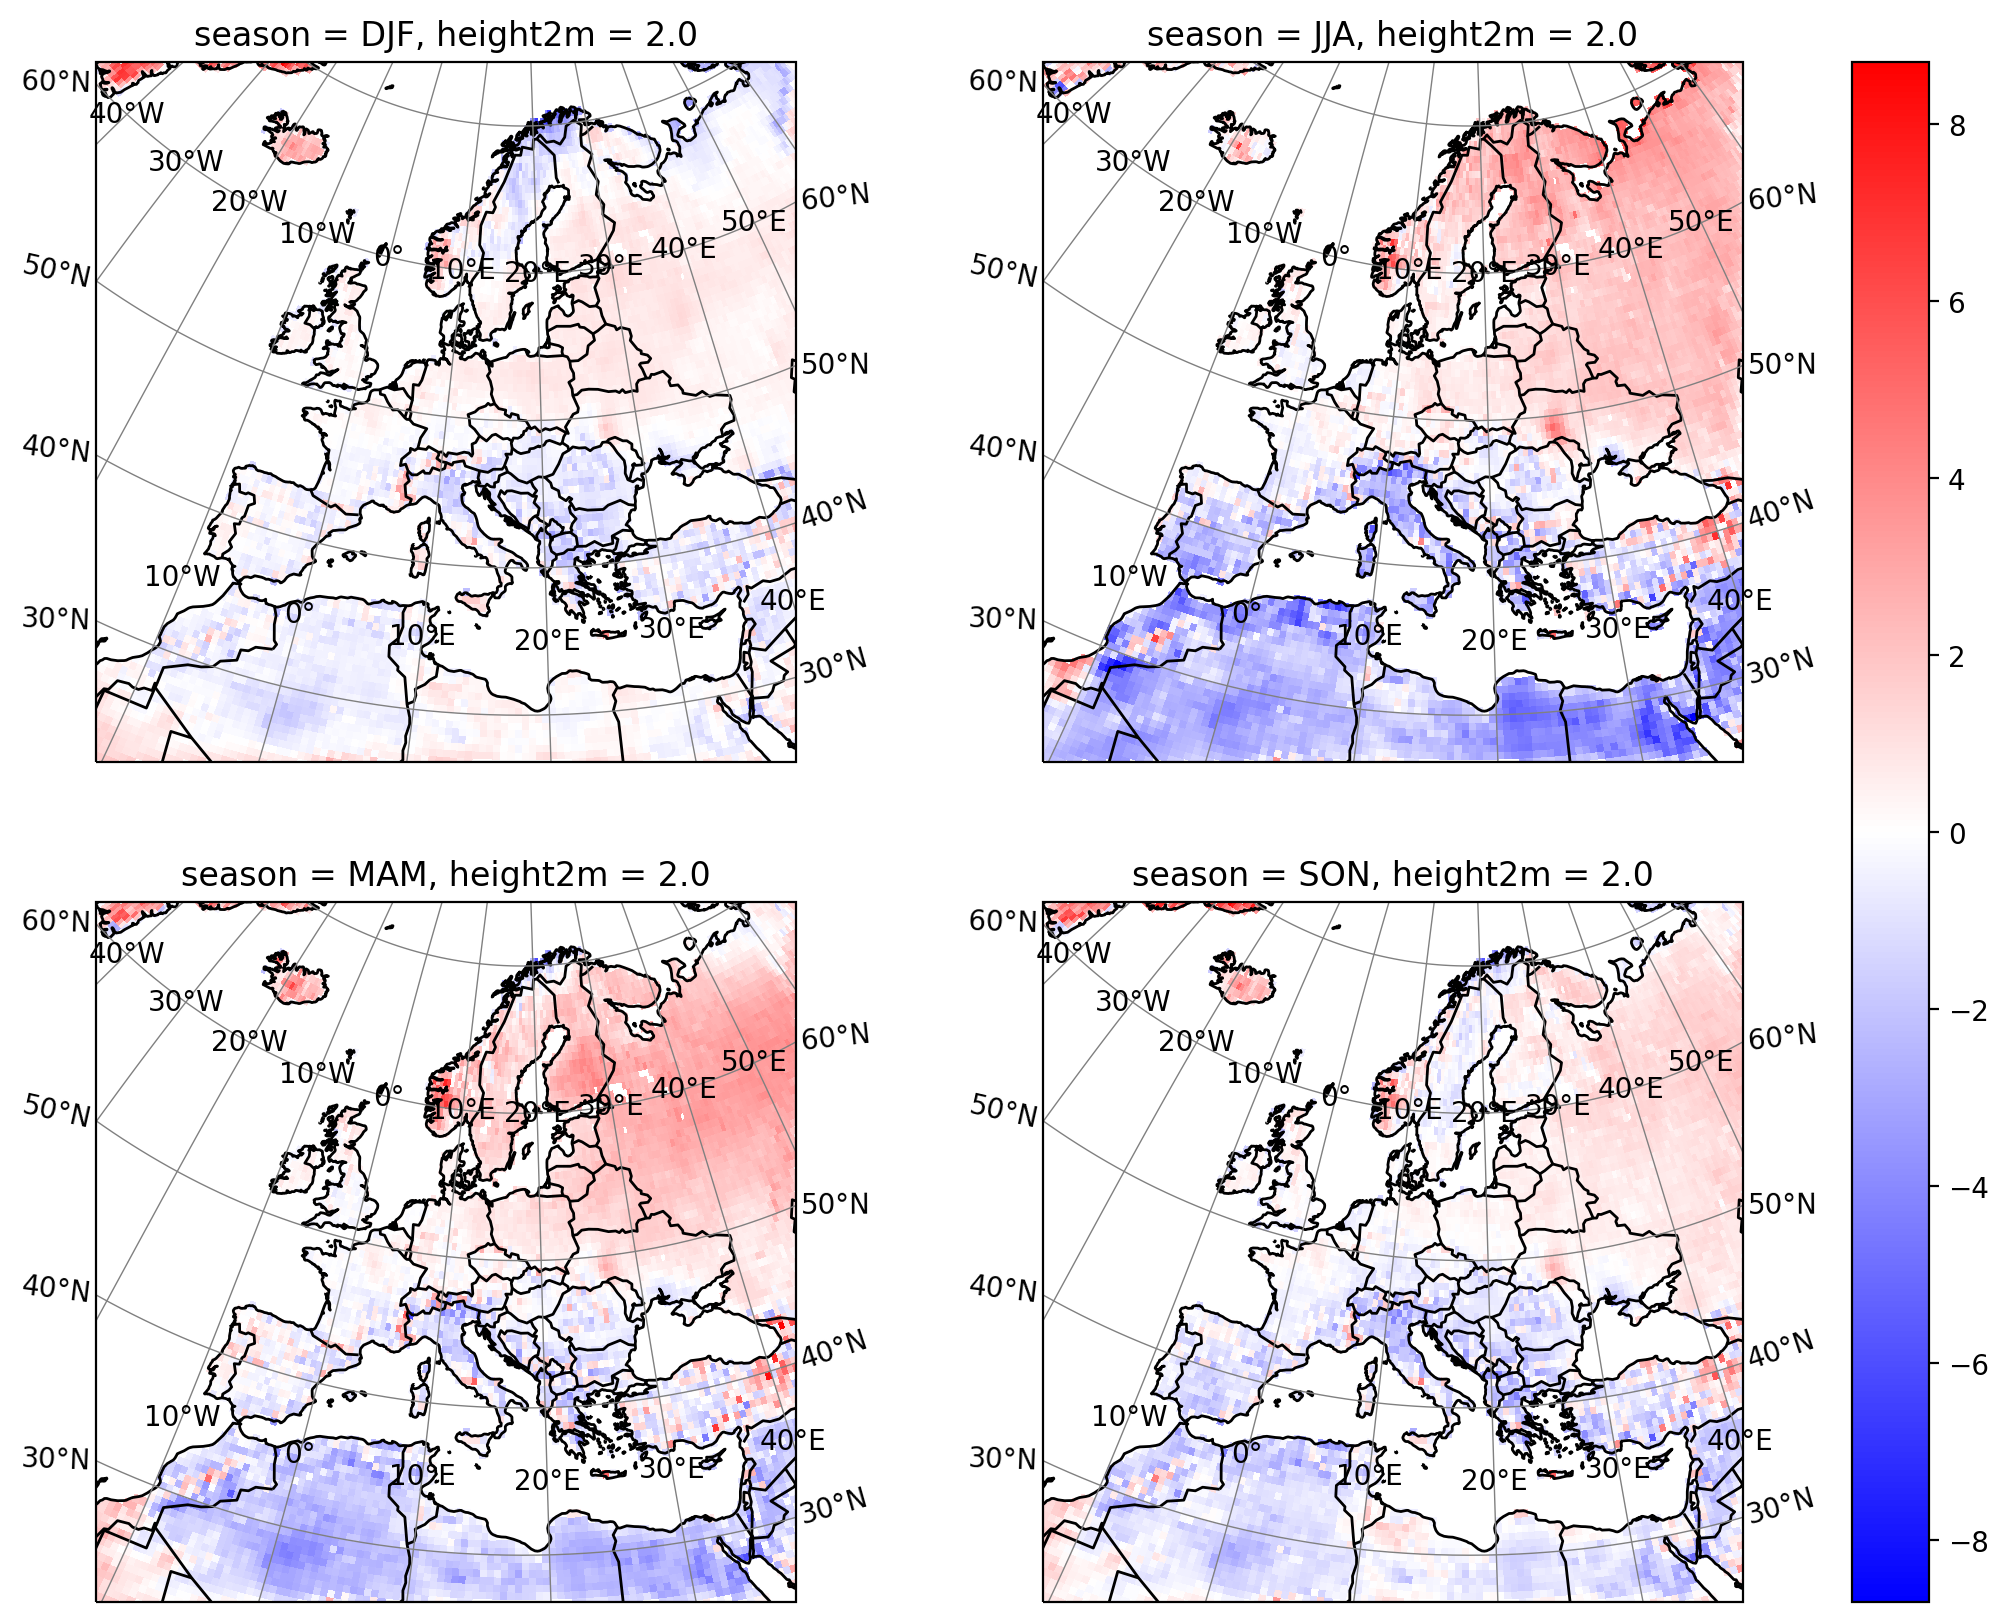

In [59]:
extent = [remo_ds.rlon.min(), remo_ds.rlon.max(), remo_ds.rlat.min(), remo_ds.rlat.max()]
extent = {"extents": extent, "crs": transform}
plot.plot_seasons(compare_cru.tas, extent=extent, projection=transform,
                  borders=True, xlocs=range(-180,180,10), ylocs=range(-90,90,10), figsize=(14,10))

## EOBS

In [44]:
compare_eobs = analysis.compare_seasons(remo_tas, eobs_tas).compute()

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_433x433_201x464.nc 
Reuse pre-computed weights? False 
Input grid shape:           (433, 433) 
Output grid shape:          (201, 464) 
Periodic in longitude?      False


<module 'matplotlib.pyplot' from '/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/matplotlib/pyplot.py'>

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) 

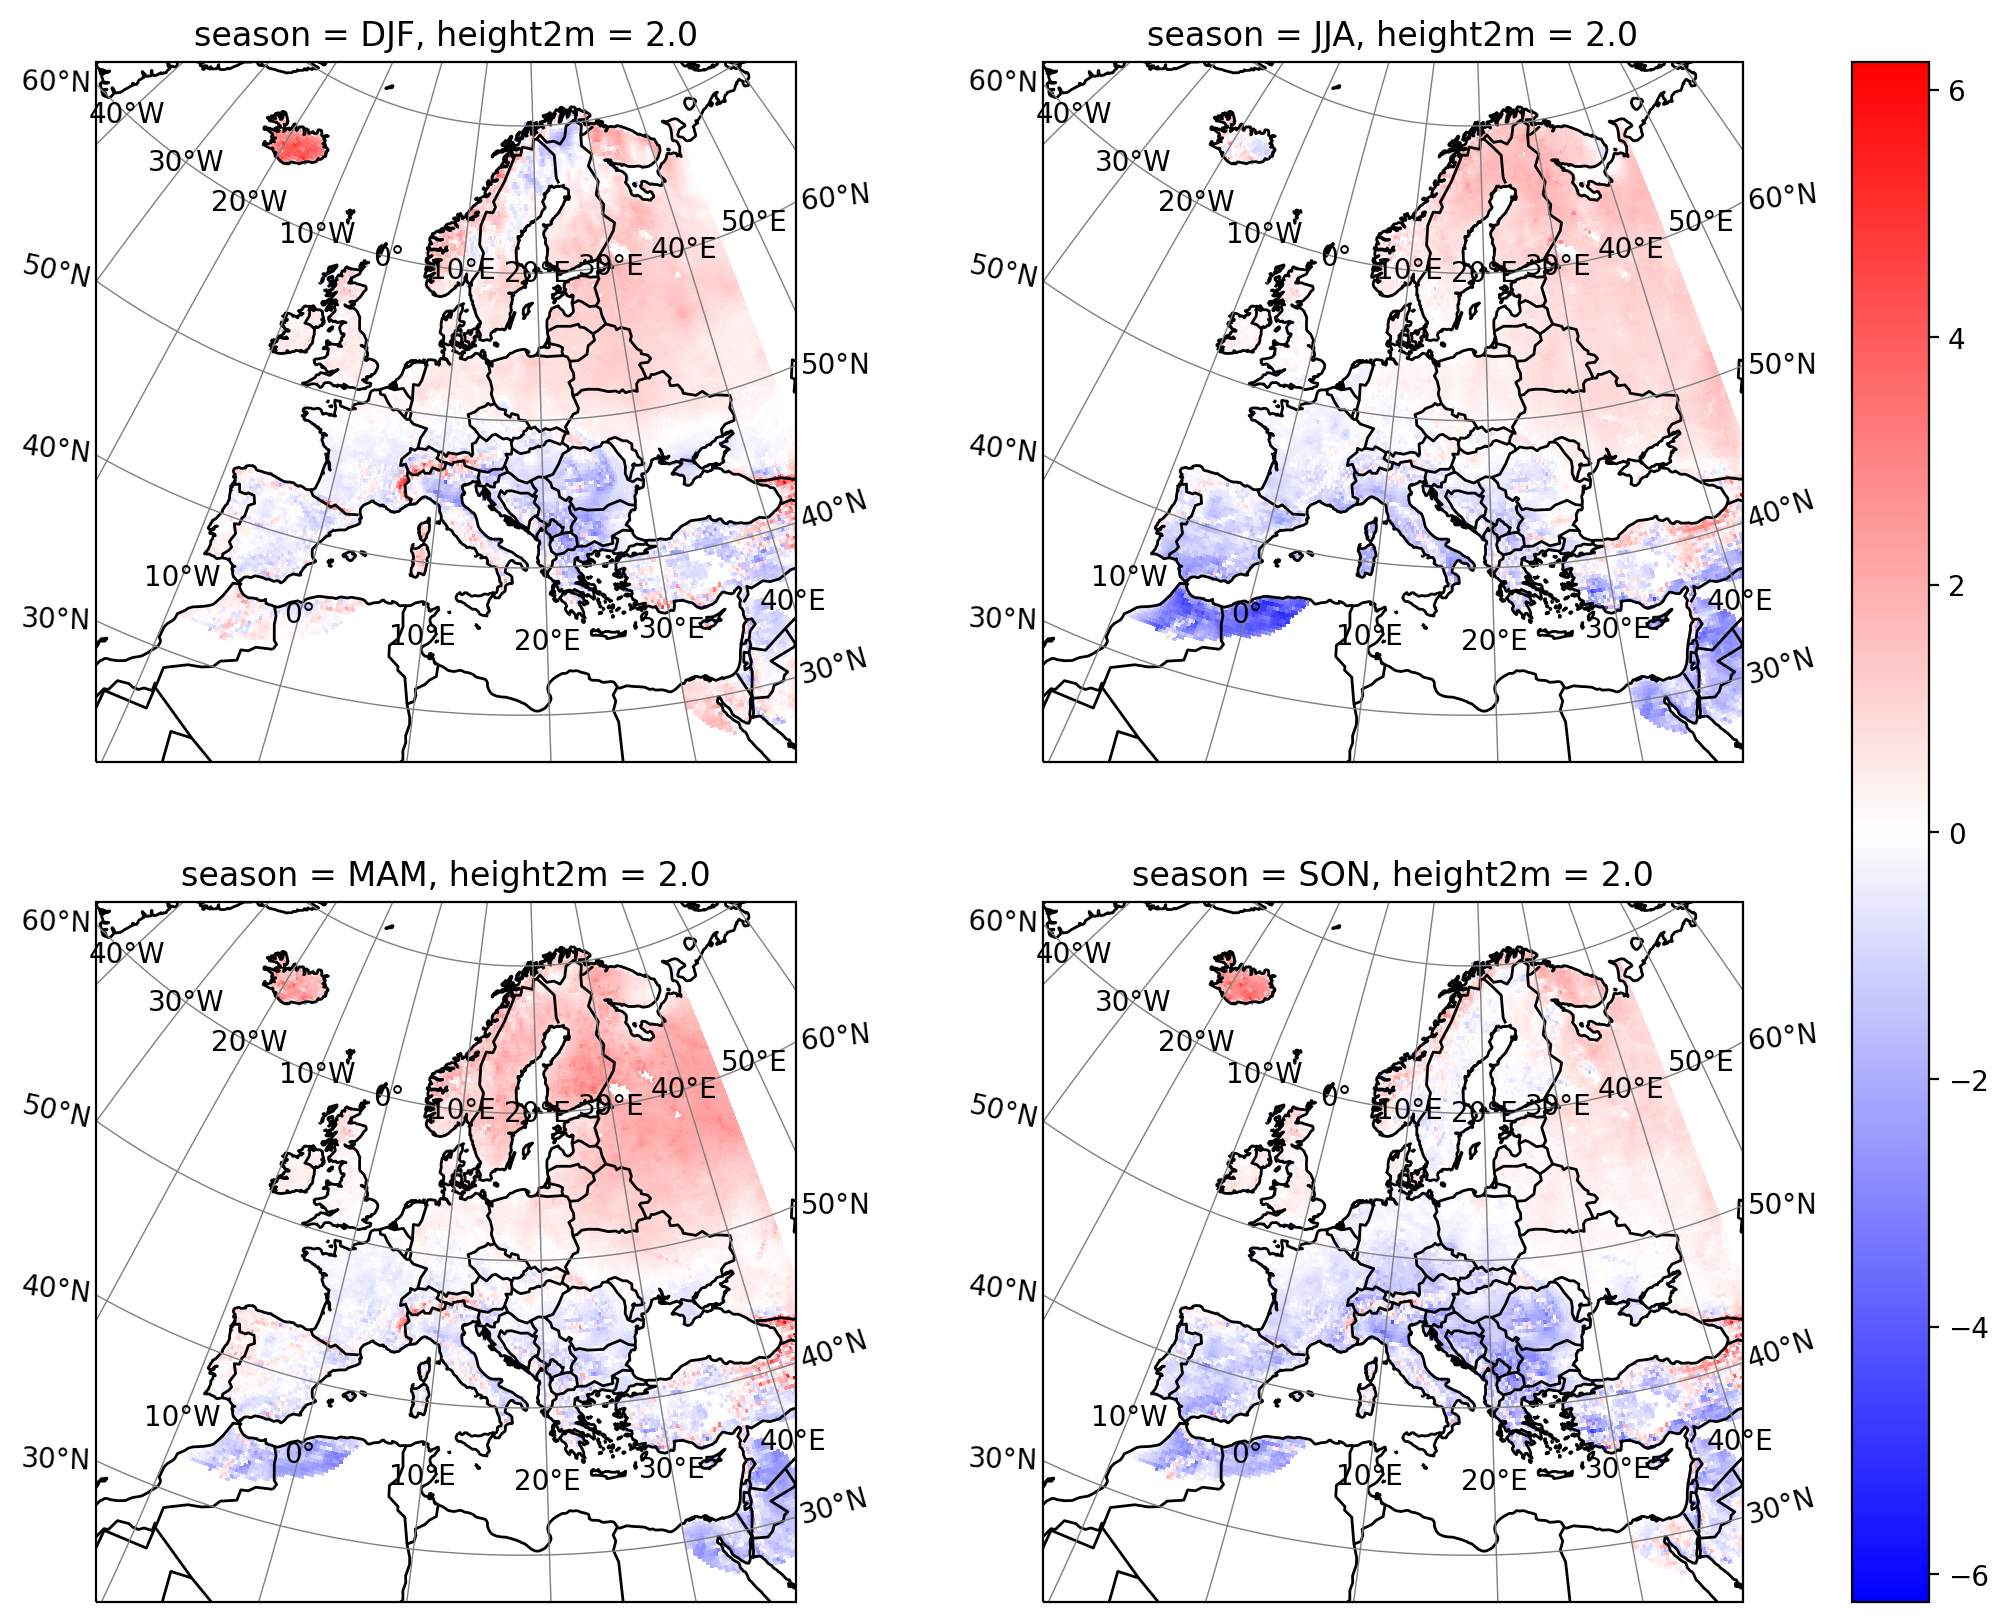

In [60]:
extent = [remo_ds.rlon.min(), remo_ds.rlon.max(), remo_ds.rlat.min(), remo_ds.rlat.max()]
extent = {"extents": extent, "crs": transform}
plot.plot_seasons(compare_eobs.tas, extent=extent, projection=transform,
                  borders=True, xlocs=range(-180,180,10), ylocs=range(-90,90,10), figsize=(14,10))